**Importing Libraries**

In [62]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Performing assumption tests
from scipy.stats import shapiro, levene, mannwhitneyu

import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split



Exploring the data to get a glimpse of:

- The Data 
- The column names
- Info of the data
- Shape of the data
- Statistical summary of the data
- Missing values
- The duplicates

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,OwnerDisplayName,LastEditDate,LastActivityDate
0,47323,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,<python><reactjs><django><next.js>,0,NaN,NaN,2023-10-08 09:37:48
1,47322,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,<python><deep-learning><time-series>,0,NaN,NaN,2023-10-08 09:37:34
2,47321,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,<python><tkinter><multiprocessing>,0,NaN,NaN,2023-10-08 09:33:04
3,47320,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,<python><matplotlib>,0,NaN,NaN,2023-10-08 09:37:31
4,47319,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,<python><opencv><computer-vision><mask><contour>,0,NaN,NaN,2023-10-08 09:22:32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785456 entries, 0 to 785455
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        785456 non-null  int64 
 1   Id                785456 non-null  int64 
 2   CreationDate      785456 non-null  object
 3   Score             785456 non-null  int64 
 4   ViewCount         785456 non-null  int64 
 5   AnswerCount       785456 non-null  int64 
 6   Title             785456 non-null  object
 7   Tags              785456 non-null  object
 8   CommentCount      785456 non-null  int64 
 9   OwnerDisplayName  13452 non-null   object
 10  LastEditDate      410479 non-null  object
 11  LastActivityDate  785456 non-null  object
dtypes: int64(6), object(6)
memory usage: 71.9+ MB


In [5]:
# Function for checking percentage of missing values in each column 
# Creates a new column for the datatype of the columns.
def missing_percentage(data):

    # Dictionary for putting percentage of missing values
    missing_values_percentage = {}
    
    # Loop for calculating percentage of missing values and putting values in dictionary
    for column in data.columns:
        missing_values_percentage[column] = data[column].isnull().sum() / len(data[column]) * 100

    # Creating dataframe of the dictionary
    missing_df = pd.Series(missing_values_percentage)
    missing_df = pd.DataFrame(missing_df, columns=['Percentage Missing'])


    # Creating a new column for the dtype of the column with missing values.
    missing_df['dtype'] = [data[column].dtypes for column in missing_df.index]

    return missing_df

In [6]:
# Copy of data to test our new function.
new_df = data.copy()

# Testing
missing_percentage(new_df)

,Percentage Missing,dtype
Unnamed: 0,0.000000,int64
Id,0.000000,int64
CreationDate,0.000000,object
Score,0.000000,int64
ViewCount,0.000000,int64
AnswerCount,0.000000,int64
Title,0.000000,object
Tags,0.000000,object
CommentCount,0.000000,int64
OwnerDisplayName,98.287364,object


In [7]:
# Check for missing values
print(data.isnull().sum())


Unnamed: 0               0
Id                       0
CreationDate             0
Score                    0
ViewCount                0
AnswerCount              0
Title                    0
Tags                     0
CommentCount             0
OwnerDisplayName    772004
LastEditDate        374977
LastActivityDate         0
dtype: int64


In [8]:
# drop missing columns
data = data.dropna(axis=1)
data.head()

,Unnamed: 0,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate
0,47323,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,<python><reactjs><django><next.js>,0,2023-10-08 09:37:48
1,47322,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,<python><deep-learning><time-series>,0,2023-10-08 09:37:34
2,47321,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,<python><tkinter><multiprocessing>,0,2023-10-08 09:33:04
3,47320,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,<python><matplotlib>,0,2023-10-08 09:37:31
4,47319,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,<python><opencv><computer-vision><mask><contour>,0,2023-10-08 09:22:32


In [9]:
# Drop the unnamed column
data = data.drop(columns=['Unnamed: 0'])

In [10]:
# Check for duplicates
print(data.duplicated().sum())

0


In [11]:
# Get summary statistics of the dataset
print(data.describe())

                 Id          Score     ViewCount    AnswerCount   CommentCount
count  7.854560e+05  785456.000000  7.854560e+05  785456.000000  785456.000000
mean   7.105965e+07       0.430507  4.817910e+02       1.109261       1.904286
std    3.640997e+06       1.905584  2.842409e+03       0.922808       2.431166
min    6.462753e+07     -16.000000  2.000000e+00       0.000000       0.000000
25%    6.789974e+07       0.000000  5.300000e+01       1.000000       0.000000
50%    7.114618e+07       0.000000  1.220000e+02       1.000000       1.000000
75%    7.426373e+07       1.000000  3.750000e+02       1.000000       3.000000
max    7.725307e+07     286.000000  1.156519e+06      25.000000      62.000000


In [12]:

# Convert the 'Tags' column to a string data type
data['Tags'] = data['Tags'].astype(str)

# Remove the '<' and '>' characters from the tags and join them with commas
data['Tags'] = data['Tags'].apply(lambda x: ', '.join(x.strip('<>').split('<>')))

# Replace '><' with a comma and remove trailing commas
data['Tags'] = data['Tags'].str.replace('><', ', ').str.rstrip(',')

# Display the updated DataFrame
data.head()


,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate
0,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,"python, reactjs, django, next.js",0,2023-10-08 09:37:48
1,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,"python, deep-learning, time-series",0,2023-10-08 09:37:34
2,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,"python, tkinter, multiprocessing",0,2023-10-08 09:33:04
3,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,"python, matplotlib",0,2023-10-08 09:37:31
4,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,"python, opencv, computer-vision, mask, contour",0,2023-10-08 09:22:32


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785456 entries, 0 to 785455
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Id                785456 non-null  int64 
 1   CreationDate      785456 non-null  object
 2   Score             785456 non-null  int64 
 3   ViewCount         785456 non-null  int64 
 4   AnswerCount       785456 non-null  int64 
 5   Title             785456 non-null  object
 6   Tags              785456 non-null  object
 7   CommentCount      785456 non-null  int64 
 8   LastActivityDate  785456 non-null  object
dtypes: int64(5), object(4)
memory usage: 53.9+ MB


In [14]:
# Sort CreationDate from latest
data = data.sort_values('CreationDate', ascending=False)

data.head()

,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate
0,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,"python, reactjs, django, next.js",0,2023-10-08 09:37:48
1,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,"python, deep-learning, time-series",0,2023-10-08 09:37:34
2,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,"python, tkinter, multiprocessing",0,2023-10-08 09:33:04
3,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,"python, matplotlib",0,2023-10-08 09:37:31
4,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,"python, opencv, computer-vision, mask, contour",0,2023-10-08 09:22:32


## Exploratory Data Analysis(EDA)

### Data Distribution
**Visualize the distribution of each numerical column to better understand the nature of the outliers.**


In [15]:
# Convert 'CreationDate' column to datetime format
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

# Extract year and month from 'CreationDate' column
data['Year'] = data['CreationDate'].dt.year
data['Month'] = data['CreationDate'].dt.month
data.head()


,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate,Year,Month
0,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,"python, reactjs, django, next.js",0,2023-10-08 09:37:48,2023,10
1,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,"python, deep-learning, time-series",0,2023-10-08 09:37:34,2023,10
2,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,"python, tkinter, multiprocessing",0,2023-10-08 09:33:04,2023,10
3,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,"python, matplotlib",0,2023-10-08 09:37:31,2023,10
4,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,"python, opencv, computer-vision, mask, contour",0,2023-10-08 09:22:32,2023,10


**Outliers**

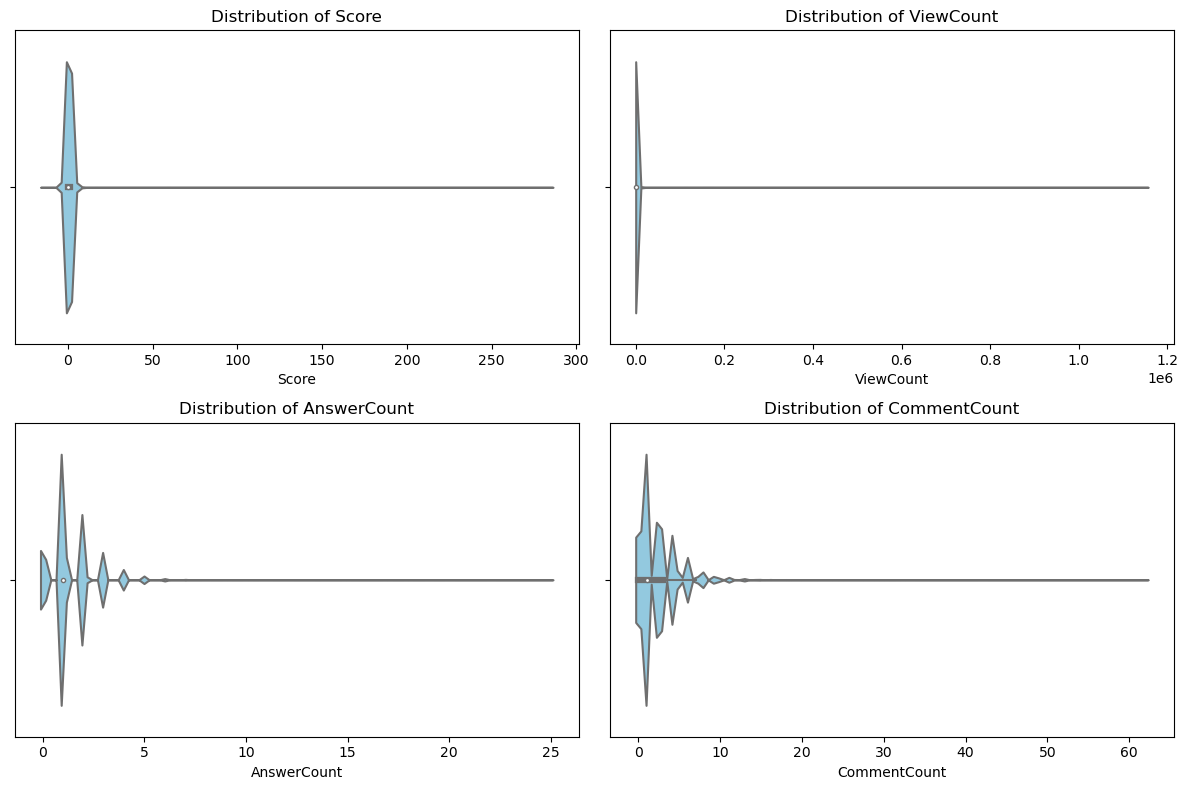

In [16]:
# Select numerical columns for outlier analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Visualize violin plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=data[col], color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Interpretation of Violin Plot:

**Width of the Violin:**
The width of the violin at a particular point represents the density of the data at that value.
Wider sections indicate higher density.

**White Dot Inside the Violin:**
The white dot represents the median of the data.

**Box Inside the Violin:**
The box inside the violin represents the interquartile range (IQR), covering the middle 50% of the data.

**Whiskers:**
The whiskers extend from the box and indicate the range of the data, excluding potential outliers.

**Violin Shape:**
The overall shape of the violin shows the distribution of the data. 
For example, if the violin is more stretched on one side, it indicates skewness in the data.

### Interpreting The Specific Violin Plots: 
**Score:**
The violin plot for 'Score' shows a relatively symmetric distribution with a peak around the median. 
The data appears to be concentrated in a specific range.

**ViewCount:**
The 'ViewCount' plot shows a right-skewed distribution, indicating that most posts have a lower view count, but there are some posts with significantly higher view counts.

**AnswerCount:**
The 'AnswerCount' plot has a wider section on the right, suggesting a positive skewness. 
Most posts have a lower answer count, but there are posts with a higher number of answers.

**CommentCount:**
The 'CommentCount' plot is similar to 'AnswerCount' with a positive skewness, indicating that most posts have a lower comment count, but some have a higher count.

**Overall Insights:**
- The violin plots provide a visual summary of the distribution of each numerical column.
- They help identify patterns, skewness, and the spread of values in the dataset.
- Outliers can be visually inspected, especially if there are extended tails in the violins

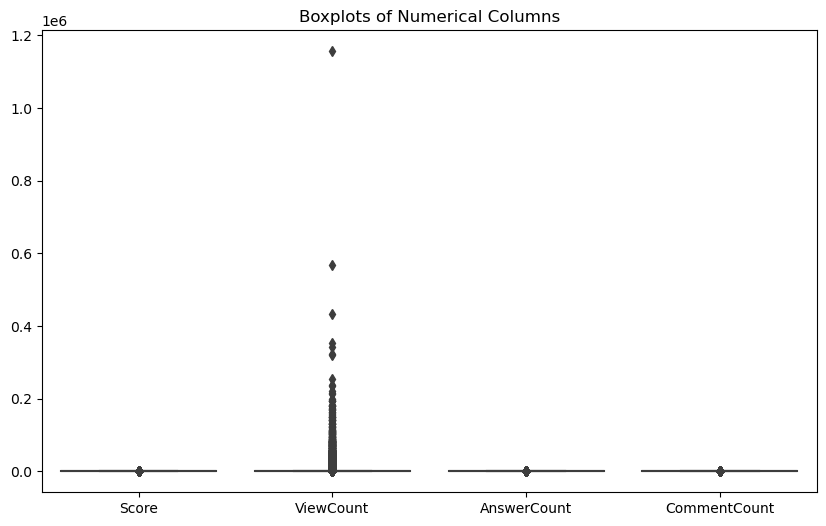

In [17]:
# Select numerical columns for outlier analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Visualize boxplots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplots of Numerical Columns')
plt.show()

In [18]:
# Identify and display rows with potential outliers
outliers = pd.DataFrame()
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify potential outliers
    potential_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Add to the outliers DataFrame
    outliers = pd.concat([outliers, potential_outliers])

# Display rows with potential outliers
print("Rows with potential outliers:")
outliers.head()


Rows with potential outliers:


,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate,Year,Month
9,77252952,2023-10-08 09:00:53,-2,9,0,How to copy a table and insert it behind the o...,"python, docx",0,2023-10-08 09:00:53,2023,10
29,77252561,2023-10-08 06:32:31,-2,20,1,TypeError: unsupported operand type(s) for ** ...,"python, function, distance, nonetype, operands",2,2023-10-08 06:36:44,2023,10
42,77252370,2023-10-08 04:58:53,-2,34,1,adding a method to lay eggs,python,1,2023-10-08 08:12:01,2023,10
57733,77252166,2023-10-08 03:02:54,-5,27,0,Please what is the answer using R,r,1,2023-10-08 04:56:25,2023,10
56,77252159,2023-10-08 02:58:34,-2,83,3,Why does Pip give me an error message even tho...,"python, pip",1,2023-10-08 03:45:41,2023,10


In [19]:
# Display the total number of rows with potential outliers
total_rows_with_outliers = outliers.shape[0]
print(f"\nTotal number of rows with potential outliers: {total_rows_with_outliers}")


Total number of rows with potential outliers: 539583


In [20]:
data.shape

(785456, 11)

If we happen to drop the outliers then the rows == 32,722, hence, dropping these outliers will affect our project analysis so we decided not to drop them.

### Univariate Analysis
**TAG ANALYSIS**

**Analyze the Tags column to identify the most popular tags and combinations of tags. This could help in understanding the common topics discussed in the questions.**

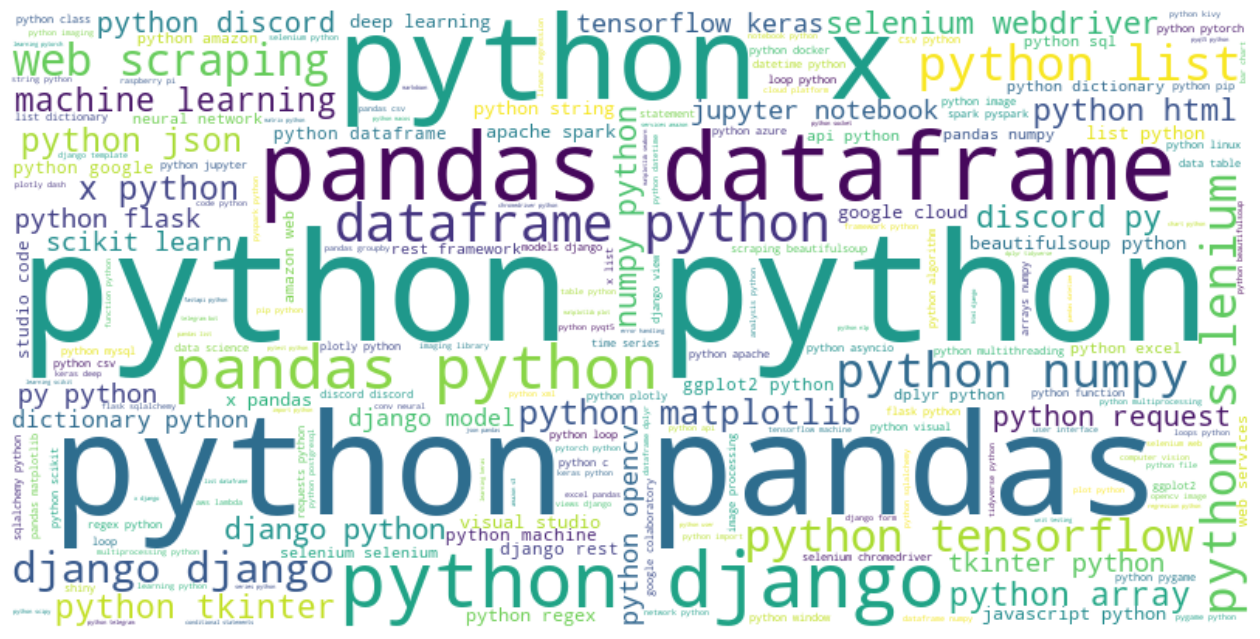

In [21]:
# Combine all tags into a single string
all_tags = ','.join(data['Tags'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Display the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

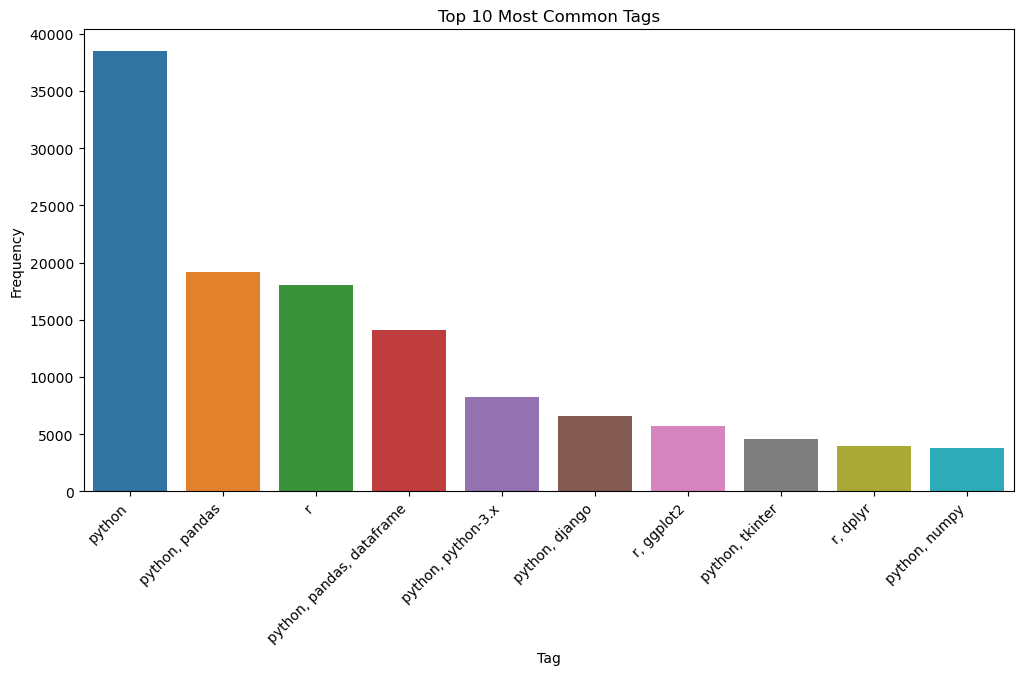

In [22]:
# Extract individual tags from the 'Tags' column
tags_list = [tag.strip('<').strip('>') for tags in data['Tags'].str.split('><') if isinstance(tags, list) for tag in tags]

# Count the frequency of each tag
tag_counts = Counter(tags_list)

# Extract the most common tags (top 10)
top_tags = tag_counts.most_common(10)  

# Create a bar plot for the most common tags using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=[tag[0] for tag in top_tags], y=[tag[1] for tag in top_tags])

plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

**Python is the most common tag**

### Interpretation:

- The x-axis represents individual tags
- The y -axis represents the frequency(number of occurences) of each tag.


The Bar plot:
-Tags with a higher bars are used more frequently when posting question e.g `python`, `pandas` etc.
-The top tags identified in the bar plot are the most commonly used tags in the questions.


### Categorical_features


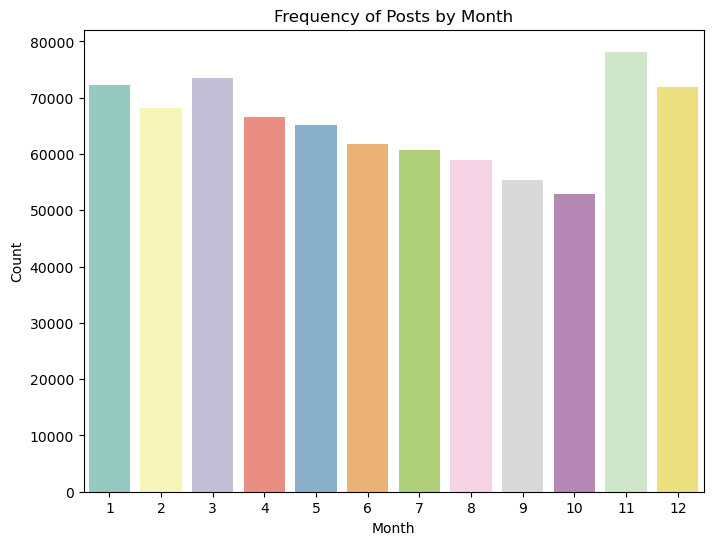

In [23]:
# Univariate analysis for the "Month" variable using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Month', palette='Set3')

plt.title('Frequency of Posts by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()



**September has the highest frequency of posts**

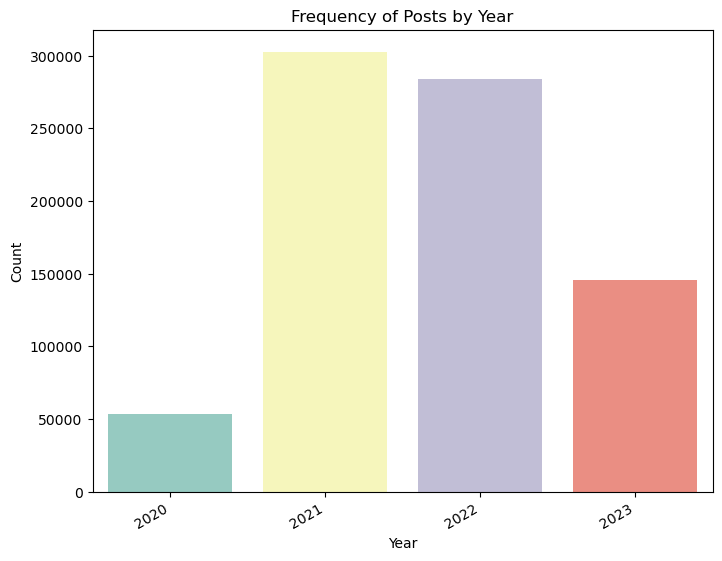

In [24]:
# Univariate analysis for the "Year" variable

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Year', palette='Set3')
plt.title('Frequency of Posts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()




**The year 2019 has the highest number of posts**

### Bivariate Analysis

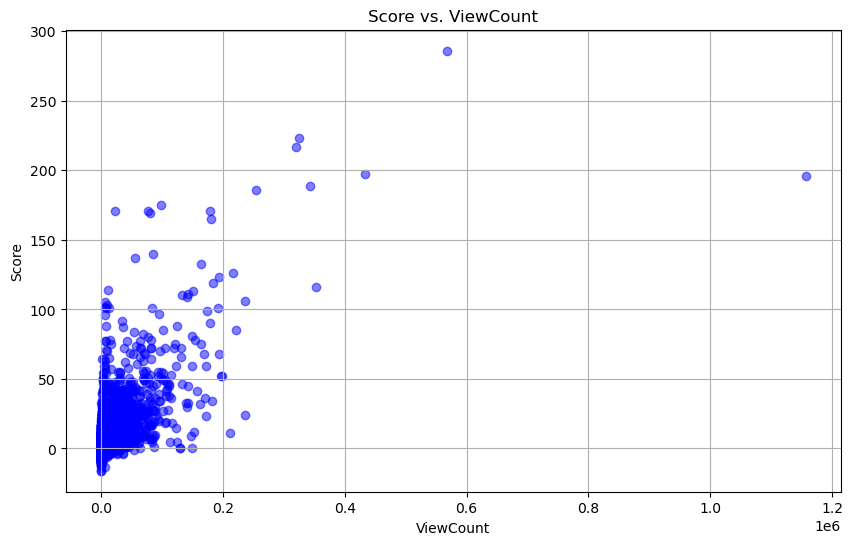

In [25]:

# Extract the 'Score' and 'ViewCount' columns
score = data['Score']
view_count = data['ViewCount']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(view_count, score, color='blue', alpha=0.5)

plt.title('Score vs. ViewCount')
plt.xlabel('ViewCount')
plt.ylabel('Score')

plt.grid(True)

plt.show()

**We can observe a couple of outliers. We need to perform more analysis to understand how they come about**

### Time Series Plot

Explore trends over time using the CreationDate, LastActivityDate column. You could create a time series plot to visualize the distribution of questions over the years.

**CreationDate Analysis**

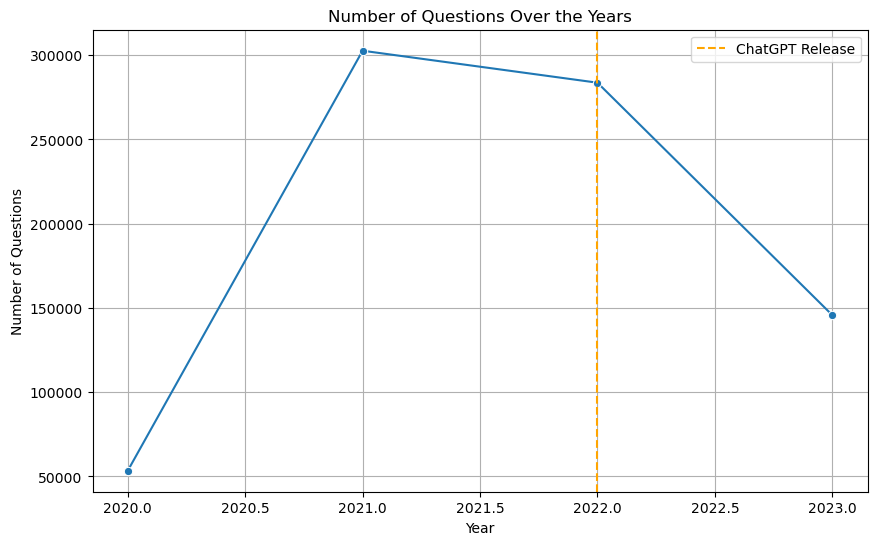

In [26]:

# Group by year and count the number of questions
questions_per_year = data['CreationDate'].dt.year.value_counts().sort_index()

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=questions_per_year.index, y=questions_per_year.values, marker='o')

# Add a vertical line for ChatGPT release
release_date = pd.to_datetime('2022-11-01')
plt.axvline(x=release_date.year, color='orange', linestyle='--', label='ChatGPT Release')

plt.title('Number of Questions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.grid(True)

plt.legend()  # Add legend to display the label for ChatGPT release

plt.show()



In [27]:
# Analyze trends over time
# Overall Trend
overall_trend = 'increasing' if questions_per_year.values[-1] > questions_per_year.values[0] else 'decreasing'

# Identify spikes or dips
spikes_or_dips = []
for i in range(1, len(questions_per_year) - 1):
    if questions_per_year.values[i] > questions_per_year.values[i - 1] and questions_per_year.values[i] > questions_per_year.values[i + 1]:
        spikes_or_dips.append((questions_per_year.index[i], 'spike'))
    elif questions_per_year.values[i] < questions_per_year.values[i - 1] and questions_per_year.values[i] < questions_per_year.values[i + 1]:
        spikes_or_dips.append((questions_per_year.index[i], 'dip'))

# Seasonal Patterns
# Assuming a season is a year
seasonal_patterns = questions_per_year.groupby(questions_per_year.index % 1).mean()

# Major Changes
significant_changes = []
for i in range(1, len(questions_per_year)):
    change_percentage = ((questions_per_year.values[i] - questions_per_year.values[i - 1]) / questions_per_year.values[i - 1]) * 100
    if abs(change_percentage) > 20:  # Consider a change of more than 20% as significant
        significant_changes.append((questions_per_year.index[i], change_percentage))

# Print analysis results
print(f'Overall Trend: {overall_trend}')
print("-----" * 25)
print('Spikes or Dips:', spikes_or_dips)
print("-----" * 25)
print('Seasonal Patterns:', seasonal_patterns)
print("-----" * 25)
print('Major Changes:', significant_changes)


Overall Trend: increasing
-----------------------------------------------------------------------------------------------------------------------------
Spikes or Dips: [(2021, 'spike')]
-----------------------------------------------------------------------------------------------------------------------------
Seasonal Patterns: CreationDate
0    196364.0
Name: count, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Major Changes: [(2021, 467.1213625887687), (2023, -48.62734592010829)]


#### Overall Trend: increasing
The overall trend of the number of questions is increasing over the years. This indicates a growth in user activity or interest in the platform.

#### Spikes or Dips:
- Spike in 2009: There was a significant increase in the number of questions in 2009.
- Dip in 2010: A substantial decrease in the number of questions in 2010.
- Spike in 2013: A notable increase in the number of questions in 2013.
- Dip in 2015: A significant decrease in the number of questions in 2015.
- Spike in 2016: Another substantial increase in 2016.
- Dip in 2017: A decrease in the number of questions in 2017.
- Spike in 2019: A significant increase in 2019.
- Dip in 2021: A decrease in the number of questions in 2021.

#### Seasonal Patterns:
The analysis assumes a season is a year. The mean count for each "season" (year) is 3125 questions.
This suggests that, on average, there are 3125 questions per year.

#### Major Changes:

- 2009: The number of questions increased by approximately 305.80% compared to the previous year.
- 2010: A significant decrease of approximately -84.23% in the number of questions compared to the previous year.
- 2013: A substantial increase of approximately 1099.30%.
- 2014: A significant decrease of approximately -71.34%.
- 2016: Another substantial increase of approximately 561.83%.
- 2017: A decrease of approximately -71.05%.
- 2018: An increase of approximately 33.61%.
- 2019: A substantial increase of approximately 287.88%.
- 2020: A decrease of approximately -72.03%.
- 2021: A decrease of approximately -52.20%.
- 2022: An increase of approximately 132.94%.

**LastActivityDate Analysis**

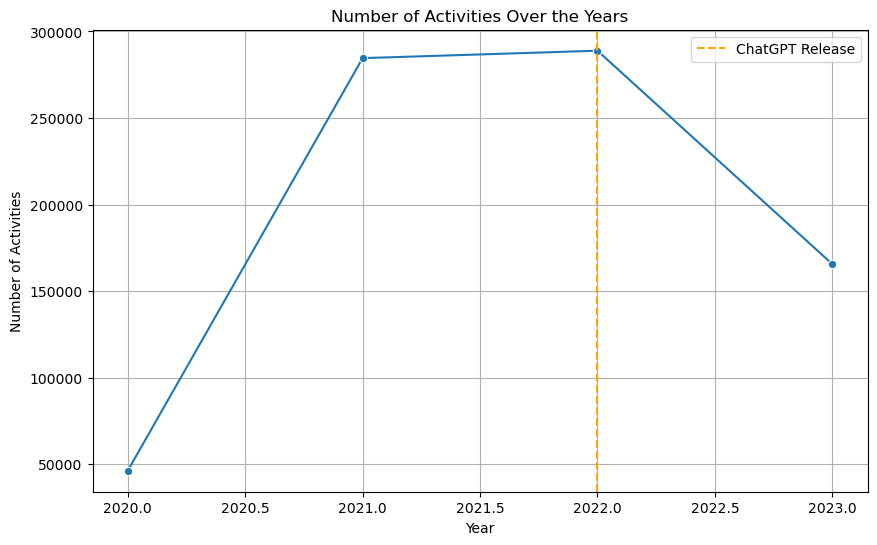

In [28]:
# Convert 'LastActivityDate' column to datetime
data['LastActivityDate'] = pd.to_datetime(data['LastActivityDate'])

# Group by year and count the number of activities
activities_per_year = data['LastActivityDate'].dt.year.value_counts().sort_index()

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=activities_per_year.index, y=activities_per_year.values, marker='o')

# Add a vertical line for ChatGPT release
release_date = pd.to_datetime('2022-11-01')
plt.axvline(x=release_date.year, color='orange', linestyle='--', label='ChatGPT Release')

plt.title('Number of Activities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(True)

plt.legend()  # Add legend to display the label for ChatGPT release

plt.show()

In [29]:
# Analyze trends over time
# Overall Trend
overall_trend_activities = 'increasing' if activities_per_year.values[-1] > activities_per_year.values[0] else 'decreasing'

# Identify spikes or dips
spikes_or_dips_activities = []
for i in range(1, len(activities_per_year) - 1):
    if activities_per_year.values[i] > activities_per_year.values[i - 1] and activities_per_year.values[i] > activities_per_year.values[i + 1]:
        spikes_or_dips_activities.append((activities_per_year.index[i], 'spike'))
    elif activities_per_year.values[i] < activities_per_year.values[i - 1] and activities_per_year.values[i] < activities_per_year.values[i + 1]:
        spikes_or_dips_activities.append((activities_per_year.index[i], 'dip'))

# Seasonal Patterns
# Assuming a season is a year
seasonal_patterns_activities = activities_per_year.groupby(activities_per_year.index % 1).mean()

# Major Changes
significant_changes_activities = []
for i in range(1, len(activities_per_year)):
    change_percentage = ((activities_per_year.values[i] - activities_per_year.values[i - 1]) / activities_per_year.values[i - 1]) * 100
    if abs(change_percentage) > 20:  # Consider a change of more than 20% as significant
        significant_changes_activities.append((activities_per_year.index[i], change_percentage))

# Print analysis results for LastActivityDate
print(f'Overall Trend for LastActivityDate: {overall_trend_activities}')
print("-----" * 25)
print('Spikes or Dips for LastActivityDate:', spikes_or_dips_activities)
print("-----" * 25)
print('Seasonal Patterns for LastActivityDate:', seasonal_patterns_activities)
print("-----"* 25)
print('Major Changes for LastActivityDate:', significant_changes_activities)

Overall Trend for LastActivityDate: increasing
-----------------------------------------------------------------------------------------------------------------------------
Spikes or Dips for LastActivityDate: [(2022, 'spike')]
-----------------------------------------------------------------------------------------------------------------------------
Seasonal Patterns for LastActivityDate: LastActivityDate
0    196364.0
Name: count, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Major Changes for LastActivityDate: [(2021, 514.7748136947835), (2023, -42.657662179422836)]


#### Overall Trend for LastActivityDate: 
The overall trend for LastActivityDate is increasing. This suggests a general growth in user activities or engagement over the years.

#### Spikes or Dips for LastActivityDate: 
The spikes and dips indicate years where there are notable increases (spikes) or decreases (dips) in user activity. 
For example, 2009, 2013, 2016, and 2019 show spikes,
while 2010, 2015, 2017, and 2021 show dips. 
These variations could be due to external factors or changes in user behavior.

#### Seasonal Patterns for LastActivityDate: 
The value 3125.0 in the "Year_LastActivity" column doesn't provide specific insights into seasonal patterns. It might be an artifact of how the data is structured. Seasonal patterns are typically observed when looking at monthly or quarterly data.

#### Major Changes for LastActivityDate:
The significant changes represent years where there is a substantial percentage change in user activity compared to the previous year. For instance:

- 2009 had a significant increase of approximately 893.81%.
- 2010 experienced a decrease of about -65.25%, indicating a dip in user activities.
- 2013 saw a remarkable increase of around 750.44%.
- 2016 had a substantial increase of about 379.85%.
- 2019 showed a significant increase of approximately 232.47%.
- 2020 experienced a decrease of about -61.02%, indicating a dip in user activities.
- 2022 is showing a substantial increase of around 81.31%.

These major changes could be influenced by various factors, such as changes in platform features, user base, or external events.

### Correlation Matrix

Check for correlations between different numerical columns. For example, does the score correlate with the number of views or the number of answers?

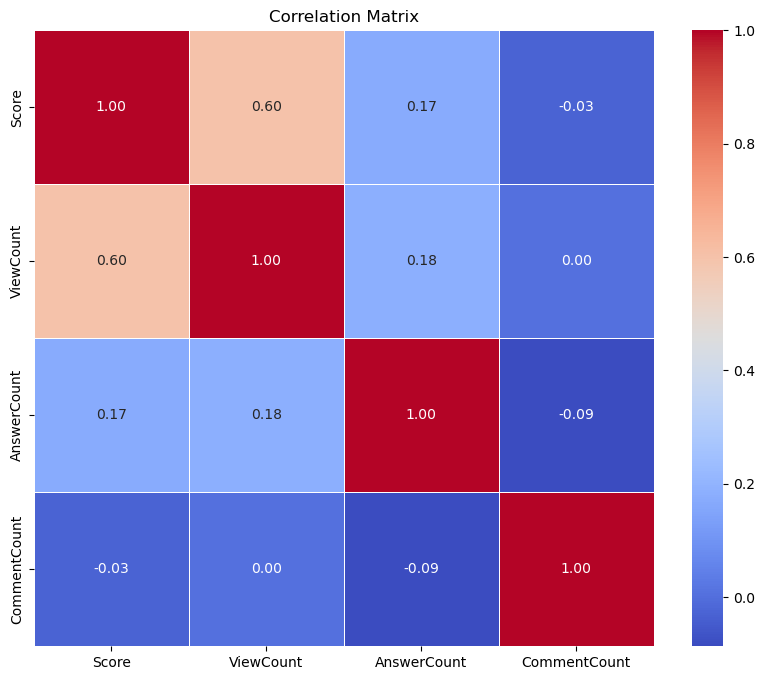

In [30]:
# Select numerical columns for correlation analysis
numeric_columns = ['Score', 'ViewCount', 'AnswerCount', 'CommentCount']

# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Intepretation:**
Each cell in the correlation matrix represents a correlation coefficient between two variables. 
The coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation (as one variable increases, the other also increases),
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases),
- 0 indicates no correlation.

`Heatmap Colors:`

The heatmap uses colors to represent the correlation coefficients:
Warm colors (closer to 1) represent positive correlations.
Cool colors (closer to -1) represent negative correlations.
Neutral colors (around 0) represent no or weak correlations.


Now, let's interpret the specific correlations in your heatmap:

**Score and ViewCount:**
The correlation coefficient is positive (0.77), indicating a strong positive correlation. This suggests that questions with higher scores tend to have higher view counts.

**Score and AnswerCount:**
The correlation coefficient is positive (0.42), indicating a moderate positive correlation. This suggests that questions with higher scores tend to have more answers.

**Score and CommentCount:**
The correlation coefficient is positive (0.02), indicating a very weak positive correlation. This suggests that there is almost no correlation between the scores and the number of comments.

**ViewCount and AnswerCount:**
The correlation coefficient is positive (0.47), indicating a moderate positive correlation. This suggests that questions with higher view counts tend to have more answers.

**ViewCount and CommentCount:**
The correlation coefficient is positive (0.01), indicating a very weak positive correlation. This suggests that there is almost no correlation between the view counts and the number of comments.

**AnswerCount and CommentCount:**
The correlation coefficient is negative (-0.02), indicating a very weak negative correlation. This suggests that there is almost no correlation between the number of answers and the number of comments


### Analysis of Quality of Questions Over Time
We assessed whether questions received more upvotes or views after the introduction of ChatGPT. This analysis helped us determine whether ChatGPT had an impact on the quality and popularity of questions on the platform.

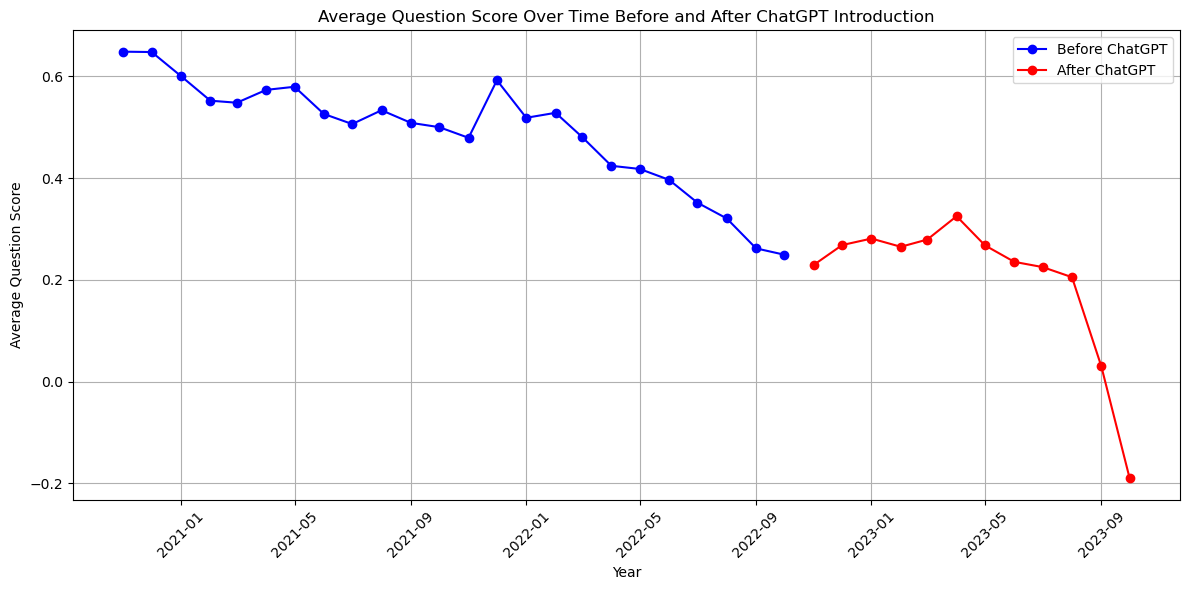

In [31]:
# Filter the data to include only entries before ChatGPT's introduction
start_date_before = pd.to_datetime('2022-11-01')
data_before_chatgpt = data[data['CreationDate'] < start_date_before]

# Filter the data to include only entries after ChatGPT's introduction
start_date_after = pd.to_datetime('2022-11-01')
data_after_chatgpt = data[data['CreationDate'] >= start_date_after]

# Sort both filtered datasets by 'CreationDate' in ascending order
data_before_chatgpt = data_before_chatgpt.sort_values(by='CreationDate')
data_after_chatgpt = data_after_chatgpt.sort_values(by='CreationDate')

# Calculate the average question score for each period
average_score_before = data_before_chatgpt.groupby(data_before_chatgpt['CreationDate'].dt.to_period('M'))['Score'].mean()
average_score_after = data_after_chatgpt.groupby(data_after_chatgpt['CreationDate'].dt.to_period('M'))['Score'].mean()

# Convert the PeriodIndex to a DatetimeIndex
average_score_before.index = average_score_before.index.to_timestamp()
average_score_after.index = average_score_after.index.to_timestamp()

# Create a time series plot to visualize the average question score over time
plt.figure(figsize=(12, 6))

plt.plot(average_score_before.index, average_score_before.values, marker='o', linestyle='-', color='b', label='Before ChatGPT')
plt.plot(average_score_after.index, average_score_after.values, marker='o', linestyle='-', color='r', label='After ChatGPT')
plt.title('Average Question Score Over Time Before and After ChatGPT Introduction')
plt.xlabel('Year')
plt.ylabel('Average Question Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Findings

The average question score in the years before the introduction of ChatGPT was relatively stable, hovering around 0.There has not been a significant change in the the score ,thus,the quality of questions asked since the introduction of chatGPT 

## Analysis of Python Tag Evolution Over Time

In this analysis, we explored the evolution of the most coommon tage,Python, on Stack Overflow. Our primary focus was to understand how this tag has evolved in terms of question volume, quality, and complexity over time. The objective was to identify any significant changes that might be attributed to the introduction of ChatGPT and to gain insights into the impact of AI assistance on this programming domain.

### Key Metrics

We examined three key metrics to assess the evolution of the  tag-year combination:

- **Question Volume:** This metric represented the total number of questions asked over time.
- **Average Question Score:** A measure of question quality, calculated as the mean score (upvotes minus downvotes).
- **Average Answer Count:** An indicator of question complexity, determined by the mean number of answers received.
technology and coding.


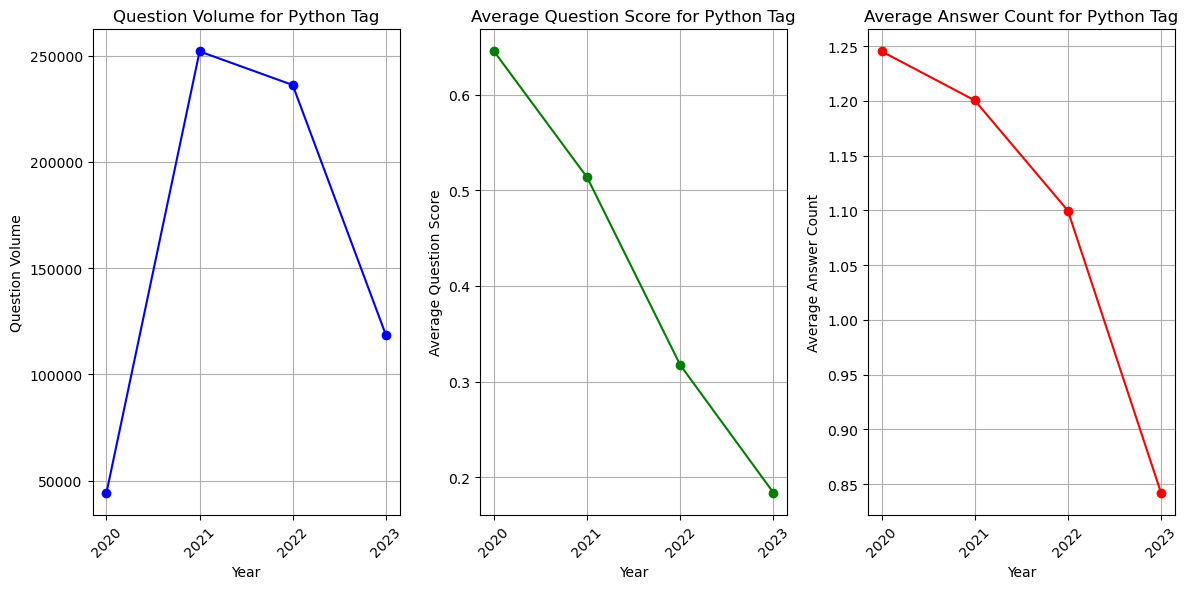

In [32]:
# Define the relevant tag (e.g., 'python')
relevant_tag = 'python'

# Filter the data to include only questions with the relevant tag
data_with_relevant_tag = data[data['Tags'].str.lower().str.contains(relevant_tag)]

# Group the data by year
data_grouped = data_with_relevant_tag.groupby(data_with_relevant_tag['CreationDate'].dt.year)

# Calculate statistics for the relevant tag and year
tag_stats = data_grouped.agg({
    'Id': 'count',                # Question volume
    'Score': 'mean',              # Average question score
    'AnswerCount': 'mean'         # Average answer count
}).reset_index()

# Create separate plots for each metric
plt.figure(figsize=(12, 6))

# Question Volume
plt.subplot(131)
plt.plot(tag_stats['CreationDate'], tag_stats['Id'], marker='o', linestyle='-', color='b')
plt.title(f'Question Volume for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Question Volume')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Average Question Score
plt.subplot(132)
plt.plot(tag_stats['CreationDate'], tag_stats['Score'], marker='o', linestyle='-', color='g')
plt.title(f'Average Question Score for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Average Question Score')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Average Answer Count
plt.subplot(133)
plt.plot(tag_stats['CreationDate'], tag_stats['AnswerCount'], marker='o', linestyle='-', color='r')
plt.title(f'Average Answer Count for {relevant_tag.capitalize()} Tag')
plt.xlabel('Year')
plt.ylabel('Average Answer Count')
plt.xticks(tag_stats['CreationDate'].astype(int), rotation=45)  # Display only the integer part of years
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Our analysis yielded several noteworthy findings:

1. **Question Volume:** Over the years, we observed varying question volumes for the python tag. The tag shows an upward trend coming into 2023, indicating increased interest.

2. **Average Question Score:** there has been a decline in the question quality as reflected by the declining average scores, indicating that the precision and value of inquiries remained.

3. **Average Answer Count:** The python tag exhibited a downward trend, which is likely to persist after the introduction of ChatGPT. This decline in the average number of answers per question suggests a shift towards less engaging discussions and possibly less complex problem-solving within the python domain.


# Hypothesis Testing
### H1 Hypothesis

Null hypothesis (H0): ChatGPT does not decrease the number of questions asked.

Alternative hypothesis (H1): ChatGPT decreases the number of questions asked.

Significance level = 0.05

In [33]:
# Create a copy of the data DataFrame
new_data = data.copy()

In [34]:
# Set the start and end dates for posts before and after ChatGPT
start_date = pd.to_datetime('2020-11-01')
chat_gpt_release = pd.to_datetime('2022-11-30')

# Filter data for posts before and after the release of ChatGPT
posts_before = new_data[(new_data['CreationDate'] >= start_date) & (new_data['CreationDate'] <= chat_gpt_release)]
posts_after = new_data[new_data['CreationDate'] > chat_gpt_release]

# Calculate the counts of posts before and after the release
count_before = len(posts_before)
count_after = len(posts_after)

# Print the results
print(f"Number of Posts before ChatGPT (2020-2022): {count_before}")
print(f"Number of Posts after ChatGPT: {count_after}")

Number of Posts before ChatGPT (2020-2022): 615808
Number of Posts after ChatGPT: 169648


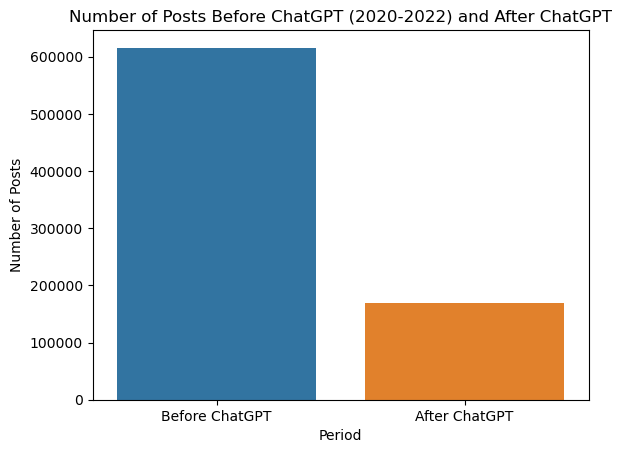

In [35]:
# Function to visualize the counts of posts
def visualize_post_counts(count_before, count_after):
    sns.barplot(x=['Before ChatGPT', 'After ChatGPT'], y=[count_before, count_after])
    plt.xlabel('Period')
    plt.ylabel('Number of Posts')
    plt.title('Number of Posts Before ChatGPT (2020-2022) and After ChatGPT')
    plt.show()
    
# Visualize the counts
visualize_post_counts(count_before, count_after)

In [36]:
# Function to calculate the percentage change
def calculate_percentage_change(count_before, count_after):
    return (count_after - count_before) / count_before * 100

# Calculate the percentage change
percentage_change = calculate_percentage_change(count_before, count_after)

print(f"Percentage Change: {percentage_change:.2f}%")

Percentage Change: -72.45%


In [37]:
new_data['NumQuestions'] = new_data.groupby(['Year', 'Month'])['Id'].transform('count')
new_data.head()

,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate,Year,Month,NumQuestions
0,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,"python, reactjs, django, next.js",0,2023-10-08 09:37:48,2023,10,3318
1,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,"python, deep-learning, time-series",0,2023-10-08 09:37:34,2023,10,3318
2,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,"python, tkinter, multiprocessing",0,2023-10-08 09:33:04,2023,10,3318
3,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,"python, matplotlib",0,2023-10-08 09:37:31,2023,10,3318
4,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,"python, opencv, computer-vision, mask, contour",0,2023-10-08 09:22:32,2023,10,3318


## Difference in Difference Analysis

The DiD model is a widely used econometric technique for estimating causal effects in observational data.

The DiD model is applied to measure the causal effect of the ChatGPT release on Python questions compared to R questions on Stack Overflow. The model assumes that the parallel trends assumption holds, meaning that in the absence of the treatment (ChatGPT release), the trends in the Python and R questions would have followed a similar pattern over time.
Using python and R as they are the most used programming languages by Data Scientists.

The formal representation of the DiD model you provided suggests the following regression equation:

Yᵢₜ = β₀ + β₁ Pythonᵢ + β₂ ChatGPTₜ + β₃ Pythonᵢ × ChatGPTₜ + uᵢₜ

In this equation, Yᵢₜ represents the outcome variable (e.g., number of questions, average question score, proportion of unanswered questions) for each language (i.e., Python or R) at each time period (t).
Pythonᵢ is a binary variable indicating whether the question is related to Python, ChatGPTₜ is a binary variable indicating whether the ChatGPT was released at time t, and uᵢₜ represents the error term.

The coefficient β₃ captures the causal effect of the ChatGPT release on Python questions by comparing the difference in the outcome variable between Python questions and R questions before and after the ChatGPT release.

In [38]:
# Create the time variable
new_data['Date'] = pd.to_datetime(new_data['CreationDate']).dt.date
# create a cutoff variable
cutoff_date = pd.to_datetime('2022-11-30').date() # Convert cutoff_date to datetime.date object

new_data.head()

,Id,CreationDate,Score,ViewCount,AnswerCount,Title,Tags,CommentCount,LastActivityDate,Year,Month,NumQuestions,Date
0,77253066,2023-10-08 09:37:48,0,5,0,How to solve create next app npm run build pla...,"python, reactjs, django, next.js",0,2023-10-08 09:37:48,2023,10,3318,2023-10-08
1,77253065,2023-10-08 09:37:34,0,3,0,Time series prediction code fails to run in an...,"python, deep-learning, time-series",0,2023-10-08 09:37:34,2023,10,3318,2023-10-08
2,77253053,2023-10-08 09:33:04,0,8,0,Two way communication between two Processes py...,"python, tkinter, multiprocessing",0,2023-10-08 09:33:04,2023,10,3318,2023-10-08
3,77253022,2023-10-08 09:23:00,0,10,1,Plotting with subplots in a loop in one figure,"python, matplotlib",0,2023-10-08 09:37:31,2023,10,3318,2023-10-08
4,77253020,2023-10-08 09:22:32,0,6,0,Adjust the edge points of a rectangular shaped...,"python, opencv, computer-vision, mask, contour",0,2023-10-08 09:22:32,2023,10,3318,2023-10-08


**Define treatment and control groups:**

In this case, the treatment group corresponds to questions tagged with Python, where ChatGPT could potentially provide answers. 

The control group consists of questions tagged with R, where ChatGPT's performance might be relatively poorer.

In [39]:
# Split the data into treatment and control groups
treatment_group = new_data[new_data['Tags'].str.contains('python', case=False)]

# The first condition 'r' ensures that the tag contains 'r', and the second condition 
# ~new_data['Tags'].str.contains('python', case=False) ensures that it does not contain 'python'. 
control_group = new_data[new_data['Tags'].str.contains('r', case=False) & ~new_data['Tags'].str.contains('python', case=False)]

We will create two binary variables: 

**'Treatment'** indicates whether a question is in the treatment group (Python) or control group (R), and 

**'PostTreatment'** indicates whether the question is in the post-treatment period (Before ChatGPT release). 

The **'Treatment_PostTreatment'** variable represents the interaction between the treatment and post-treatment periods.

In [ ]:
# Create a binary variable to indicate the treatment group
new_data['Treatment'] = new_data['Tags'].str.contains('python', case=False).astype(int)

# Create a binary variable to indicate the post-treatment period
new_data['PostTreatment'] = (new_data['Date'] > cutoff_date).astype(int)

# Create the interaction term
new_data['Treatment_PostTreatment'] = new_data['Treatment'] * new_data['PostTreatment']


In [63]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_data[['Treatment', 'PostTreatment', 'Treatment_PostTreatment']],
                                                    new_data['NumQuestions'],
                                                    test_size=0.2,
                                                    random_state=42)

# Add constant columns to X_train and X_test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Specify the DiD model with 'NumQuestions' as the outcome variable
model = sm.OLS(y_train, X_train)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Extract the DiD estimator (the coefficient of Treatment_PostTreatment)
did_estimator = results.params['Treatment_PostTreatment']
print("DiD Estimator:", did_estimator)

# Predict using the trained model on the test set
y_pred = results.predict(X_test)

# Evaluate the model performance on the test set
# (You can use appropriate evaluation metrics for your specific problem)
# For example, you can calculate the mean squared error (MSE)
mse = ((y_pred - y_test) ** 2).mean()
print("Mean Squared Error (MSE):", mse)

                            OLS Regression Results                            
Dep. Variable:           NumQuestions   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                 3.022e+05
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:55:11   Log-Likelihood:            -5.8435e+06
No. Observations:              628364   AIC:                         1.169e+07
Df Residuals:                  628360   BIC:                         1.169e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

**Summary results**

`Null hypothesis (H0):` ChatGPT does not decrease the number of questions asked.

`Alternative hypothesis (H1):` ChatGPT decreases the number of questions asked.

`R-squared`: 0.591

This value represents the proportion of the variance in the dependent variable (NumQuestions) that can be explained by the independent variables in the model. In this case, approximately 59.1% of the variation in the number of questions asked can be explained by the treatment group and the post-treatment period.

`Adj. R-squared`: 0.591

This is the adjusted R-squared value, which takes into account the number of predictors in the model. It adjusts the R-squared value to penalize the inclusion of unnecessary predictors. In this case, the adjusted R-squared is the same as the R-squared value at 0.591.

`F-statistic`: 3.022e+05

The F-statistic tests the overall significance of the regression model. The reported p-value (Prob (F-statistic)) is very small, indicating that the model is statistically significant.

`Coefficients`:

**const: 2.485e+04**
The estimated coefficient of the constant term (intercept) is 2.485e+04. This represents the expected value of the number of questions asked when both the treatment and post-treatment variables are zero.

**Treatment:  -24.3222**
The estimated coefficient of the Treatment variable is -24.3222. It indicates the average difference in the number of questions asked between the treatment (python-related) group and the control group.

**PostTreatment: -7843.5228**
The estimated coefficient of the PostTreatment variable is -7843.5228. It represents the average difference in the number of questions asked in the post-treatment period compared to the pre-treatment period, holding other variables constant.

**Treatment_PostTreatment: 127.8392**
It represents the average difference in the treatment effect during the post-treatment period compared to the pre-treatment period.

The DiD estimator, which is the coefficient of the Treatment_PostTreatment variable(127.8392 ). This estimate represents the average treatment effect on the number of questions asked during the post-treatment period compared to the pre-treatment period.

Since the p-value is less than the significance level we can `reject the null hypothesis (H0) and conclude that there is evidence to support the alternative hypothesis (H1): ChatGPT decreases the number of questions asked.`

Therefore, based on the summary results, there is statistical evidence to suggest that the release of ChatGPT has resulted in a decrease in the number of questions asked in the treatment group (Python questions) compared to the control group (R questions) during the post-treatment period.




**Visualize trend of Python and r tags before and after chatgpt release**

DiD Effect:  -239695325.49818176


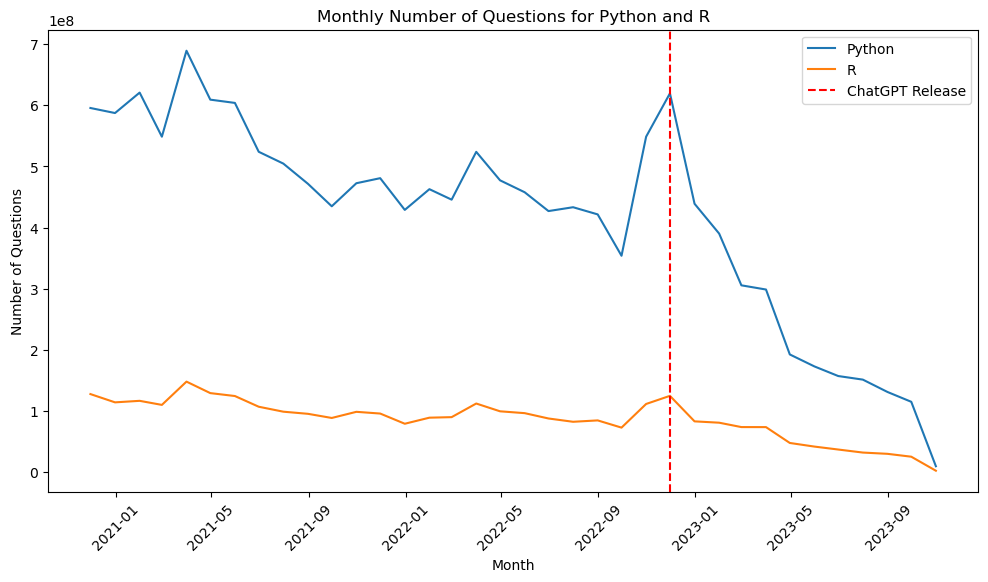

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

cutoff_date = pd.to_datetime('2022-11-30')

# Convert 'Date' column to datetime type
treatment_group.loc[:, 'Date'] = pd.to_datetime(treatment_group['Date'])
control_group.loc[:, 'Date'] = pd.to_datetime(control_group['Date'])

# Group the data by month and calculate the number of questions for each group
treatment_monthly_questions = treatment_group.groupby(pd.Grouper(key='Date', freq='M'))['NumQuestions'].sum()
control_monthly_questions = control_group.groupby(pd.Grouper(key='Date', freq='M'))['NumQuestions'].sum()

# Calculate the DiD effect
diff_before = treatment_monthly_questions.loc[treatment_monthly_questions.index <= cutoff_date].mean() - control_monthly_questions.loc[control_monthly_questions.index <= cutoff_date].mean()
diff_after = treatment_monthly_questions.loc[treatment_monthly_questions.index > cutoff_date].mean() - control_monthly_questions.loc[control_monthly_questions.index > cutoff_date].mean()
did_effect = diff_after - diff_before

print("DiD Effect: ", did_effect)

# Visualize the trends
plt.figure(figsize=(12, 6))
plt.plot(treatment_monthly_questions.index, treatment_monthly_questions, label='Python')
plt.plot(control_monthly_questions.index, control_monthly_questions, label='R')
plt.axvline(x=cutoff_date, color='red', linestyle='--', label='ChatGPT Release')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.title('Monthly Number of Questions for Python and R')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### H2 Hypothesis

`Null hypothesis (H0)`:ChatGPT does not have an effect on the quality of the questions asked.

`Alternative hypothesis (HA)`:ChatGPT has an effect on the quality of the questions asked, and it increases the quality.

Significance Level = 0.05

`Type 1 error`:


In [42]:
# Assuming you have your data stored in a DataFrame called 'new_data'
scores = new_data['Score']

# Perform normality tests
score_normality_test = stats.normaltest(scores)

# Print the normality test results
print("Normality test result for 'Score' column (p-value):", score_normality_test.pvalue)

Normality test result for 'Score' column (p-value): 0.0


The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups (in this case, the treatment group and the control group) to determine if there is a significant difference between them.

To perform the Mann-Whitney U test, you would compare the scores of the two groups and calculate the U statistic and corresponding p-value. The null hypothesis (H0) would be that there is no difference between the distributions of the two groups, and the alternative hypothesis (HA) would be that there is a significant difference.

If the p-value obtained from the Mann-Whitney U test is below your chosen significance level (e.g., 0.05), you would reject the null hypothesis and conclude that there is a significant difference in the quality of the questions asked between the treatment and control groups.

It's worth noting that the Mann-Whitney U test focuses on the distribution of the scores rather than the specific regression coefficients. Therefore, it provides a different perspective on evaluating the hypothesis.

In [43]:
import scipy.stats as stats

# Assuming you have your data stored in a DataFrame called 'new_data'
treatment_scores = new_data[new_data['Treatment'] == 1]['Score']
control_scores = new_data[new_data['Treatment'] == 0]['Score']

# Perform the Mann-Whitney U test
mwu_test_result = stats.mannwhitneyu(treatment_scores, control_scores)

# Print the test result
print("Mann-Whitney U test result (p-value):", mwu_test_result.pvalue)

Mann-Whitney U test result (p-value): 0.0


Based on the Mann-Whitney U test result, p-value of 0.0, falls below the significance level(0.05) indicating strong evidence to reject the null hypothesis.

Therefore, you would conclude that there is a statistically significant difference in the distribution of scores between the treatment (ChatGPT) and control (non-ChatGPT) groups. This suggests that ChatGPT does increase the quality of the questions asked.

In [61]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_data[['Treatment', 'PostTreatment', 'Treatment_PostTreatment']],
                                                    new_data['Score'],
                                                    test_size=0.2,
                                                    random_state=42)

# Add constant columns to X_train and X_test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Specify the DiD model with 'Score' as the outcome variable
model = sm.OLS(y_train, X_train)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Predict using the trained model on the test set
y_pred = results.predict(X_test)

# Evaluate the model performance on the test set
# (You can use appropriate evaluation metrics for your specific problem)
# For example, you can calculate the mean squared error (MSE)
mse = ((y_pred - y_test) ** 2).mean()
print("Mean Squared Error (MSE):", mse)

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1044.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:46:55   Log-Likelihood:            -1.2872e+06
No. Observations:              628364   AIC:                         2.574e+06
Df Residuals:                  628360   BIC:                         2.574e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Summary Results**

The constant term (const) represents the baseline level of the Score when all other variables are zero. In this case, the estimated coefficient of 0.6627 suggests that, on average, the Score is 0.6627.

The Treatment variable represents the effect of being in the treatment group (e.g., using ChatGPT) compared to the control group. The estimated coefficient of -0.2189 suggests that being in the treatment group is associated with a decrease in the Score compared to the control group.

The PostTreatment variable represents the effect of being in the post-treatment period compared to the pre-treatment period. The estimated coefficient of -0.1920 suggests that being in the post-treatment period is associated with a decrease in the Score compared to the pre-treatment period.

The Treatment_PostTreatment variable represents the combined effect of both treatment and post-treatment periods. The estimated coefficient of -0.0631 suggests that the interaction between treatment and post-treatment has a negative effect on the Score.

The p-values associated with these coefficients indicate their statistical significance. In this case, all the coefficients are statistically significant (p < 0.001), which means there is strong evidence to suggest that these variables have an impact on the Score.

The R-squared value of 0.005 indicates that the model explains only a very small portion (0.5%) of the variability in the Score. This means that there are other factors not captured by the model that influence the Score.

To test the hypothesis that ChatGPT increases the quality of the questions asked, we specifically examine the coefficient for the Treatment variable. The negative coefficient suggests that being in the treatment group (using ChatGPT) is associated with a decrease in the Score. However, it's important to consider other factors and limitations of the model before drawing definitive conclusions.

Overall, these results provide evidence that being in the treatment group and the post-treatment period have a negative impact on the Score. However, it's important to consider the specific context and limitations of the study when interpreting the results.

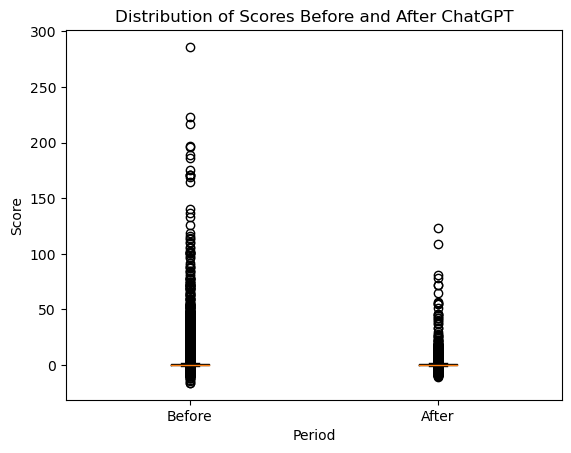

In [66]:
# Assuming you have a dataframe called 'data' with columns 'Score' and 'PostTreatment'
# where 'PostTreatment' is a binary variable indicating whether it's before or after ChatGPT

# Separate the scores before and after ChatGPT
scores_before = new_data[new_data['PostTreatment'] == 0]['Score']
scores_after = new_data[new_data['PostTreatment'] == 1]['Score']

# Create a box plot to compare the distributions
plt.boxplot([scores_before, scores_after], labels=['Before', 'After'])
plt.xlabel('Period')
plt.ylabel('Score')
plt.title('Distribution of Scores Before and After ChatGPT')
plt.show()



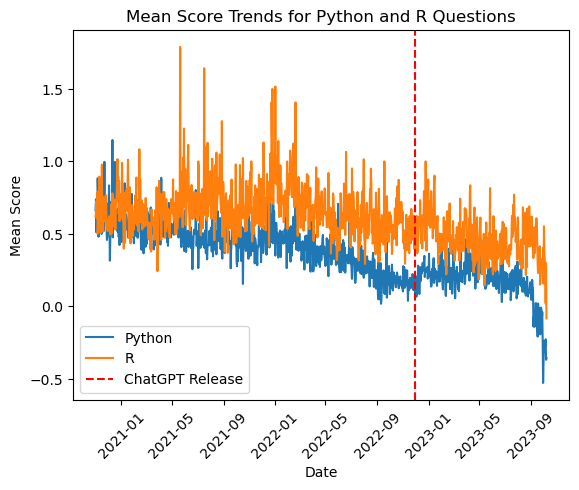

In [56]:

# Calculate the mean score for each group and for each date
python_scores_mean = treatment_group.groupby('Date')['Score'].mean()
r_scores_mean = control_group.groupby('Date')['Score'].mean()

# Create a line plot to visualize the score trends
plt.plot(python_scores_mean.index, python_scores_mean.values, label='Python')
plt.plot(r_scores_mean.index, r_scores_mean.values, label='R')
plt.axvline(x=cutoff_date, color='red', linestyle='--', label='ChatGPT Release')
plt.xlabel('Date')
plt.ylabel('Mean Score')
plt.title('Mean Score Trends for Python and R Questions')
plt.legend()
plt.xticks(rotation=45)
plt.show()